In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Install explainability libraries
!pip install shap lime
import shap
import lime
import lime.lime_tabular

In [52]:
df = pd.read_csv('AirlineScrappedReview_withSentiment.csv')
traveller_type_map = {'Solo Leisure': 0, 'Couple Leisure': 1, 'Family Leisure': 2, 'Business': 3, 'Unknown': 4, 'Various': 5}
df['Traveller_Type'] = df['Traveller_Type'].map(traveller_type_map)
class_map = {'Economy Class': 0, 'Business Class': 1, 'First Class': 2, 'Premium Economy': 3, 'unkown': 4}
df['Class'] = df['Class'].map(class_map)
verified_map = {'Trip Verified': 0, 'Not Verified': 1,}
df['Verified'] = df['Verified'].map(verified_map)
X = df[['Traveller_Type', 'Class', 'Sentiment_score', 'Verified']]
y = df['satisfaction']
categorical_cols = ['Traveller_Type', 'Class']
numeric_cols = ['Sentiment_score', 'Verified']
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

Accuracy on test set: 0.79


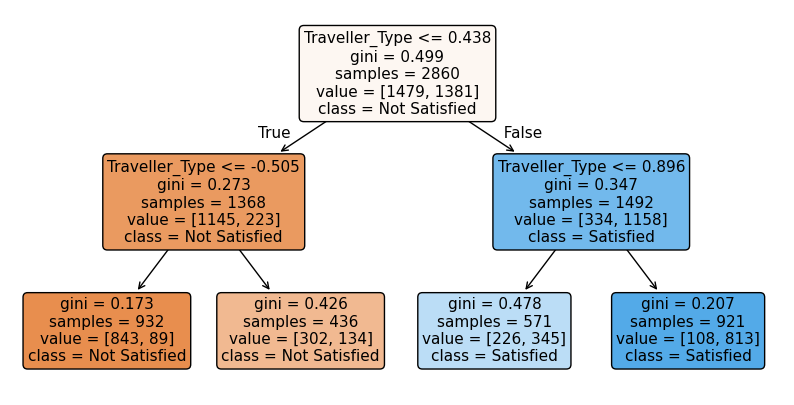

In [49]:
tree = DecisionTreeClassifier(
max_depth=2, # smaller depth → simpler tree
min_samples_split=20, # don’t split unless enough samples
random_state=42
)
tree.fit(X_train, y_train)
print(f"Accuracy on test set: {tree.score(X_test, y_test):.2f}")
plt.figure(figsize=(10, 5))
plot_tree(
tree,
feature_names=X.columns,
class_names=['Not Satisfied', 'Satisfied'],
filled=True,
rounded=True,
fontsize=11
)
plt.show()

In [54]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test, feature_names=X_test.columns)

Test Accuracy: 0.7482517482517482


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [ ]:
i=0
shap.initjs()
shap.force_plot(
explainer.expected_value[1],
shap_values[1][i],
X_test.iloc[i],
feature_names=X.columns
)

In [ ]:
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
X_train.values,
feature_names=X.columns,
class_names=['Not Satisfied', 'Satisfied'],
discretize_continuous=True
)
exp = explainer_lime.explain_instance(
X_test.values[i],
clf.predict_proba,
num_features=6
)
exp.show_in_notebook()